In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
#https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [32]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [33]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [34]:
#identify all the churned information
Churned_data=df[df['Churned'] !=0]

Churned_data

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
12,13,41,Other,North,2021-04-22 01:53:37.657108,Standard,14.99,Direct Debit,14.011035,Sci-Fi,Mobile,0.152133,1059,5,1,2021-06-13 01:53:37.657108,Found better service
13,14,70,Other,South,2020-10-29 01:53:37.657119,Standard,14.99,Direct Debit,35.339461,Sci-Fi,Mobile,3.346005,1011,2,1,2021-03-11 01:53:37.657119,Found better service
14,15,53,Other,East,2023-10-06 01:53:37.657130,Standard,14.99,Credit Card,14.191293,Documentary,Mobile,2.791956,1020,1,1,2024-07-02 01:53:37.657130,Price increase
16,17,41,Other,South,2019-07-27 01:53:37.657151,Premium,19.99,Credit Card,12.991876,Drama,Mobile,2.519855,1043,1,1,2020-03-16 01:53:37.657151,Found better service
29,30,39,Male,North,2019-11-05 01:53:37.657296,Standard,14.99,Credit Card,22.258651,Comedy,Mobile,0.838116,1034,2,1,2020-08-13 01:53:37.657296,Price increase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,26,Male,Central,2021-10-06 01:53:37.667748,Basic,9.99,Direct Debit,5.586560,Sci-Fi,PC,3.773253,1025,5,1,2022-05-30 01:53:37.667748,Found better service
991,992,34,Female,Central,2019-10-04 01:53:37.667839,Standard,14.99,PayPal,13.864300,Drama,PC,0.500756,1003,3,1,2019-11-09 01:53:37.667839,Personal reasons
992,993,43,Female,East,2021-01-26 01:53:37.667850,Premium,19.99,Credit Card,2.735002,Action,Mobile,0.070838,1099,1,1,2021-10-24 01:53:37.667850,Personal reasons
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service


<Axes: ylabel='Age'>

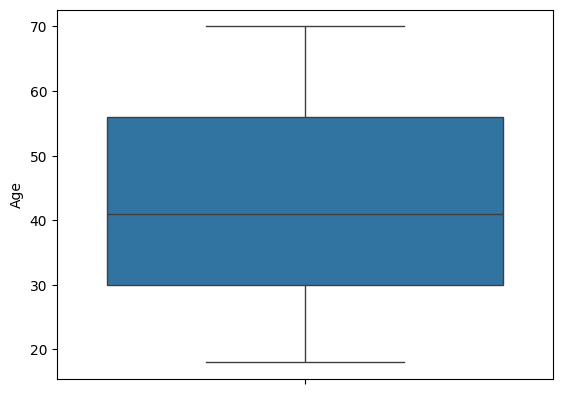

In [84]:
#Age_analysis 

sns.boxplot(Churned_data['Age'])

(array([86.,  0.,  0.,  0.,  0., 75.,  0.,  0.,  0., 85.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

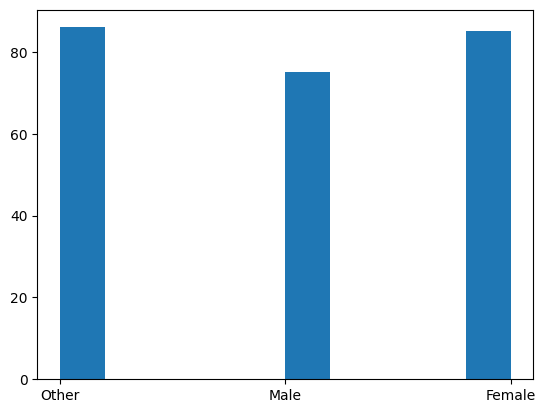

In [88]:
#Gender
plt.hist(Churned_data['Gender'])

(array([53.,  0., 42.,  0.,  0., 60.,  0., 47.,  0., 44.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

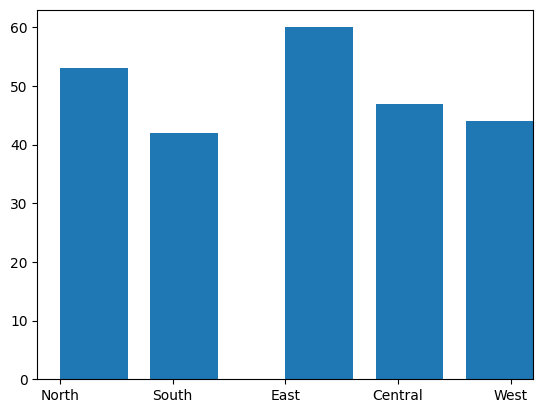

In [86]:
#location analysis 
plt.hist(Churned_data['Location'],width=0.6)

(array([49.,  0., 52.,  0.,  0., 47.,  0., 49.,  0., 49.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

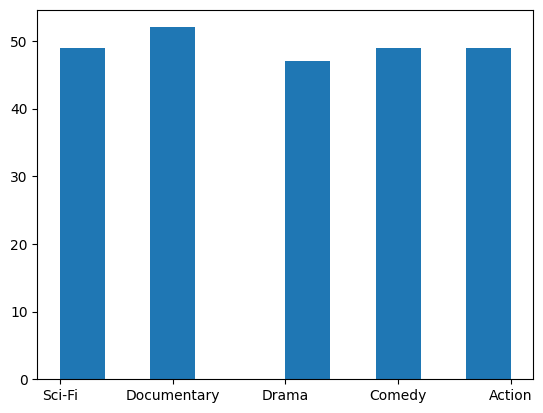

In [85]:
#Favorite_Genre analysis 
plt.hist(Churned_data['Favorite_Genre'])


(array([131.,   0.,   0.,  44.,   0.,   0.,  44.,   0.,   0.,  27.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

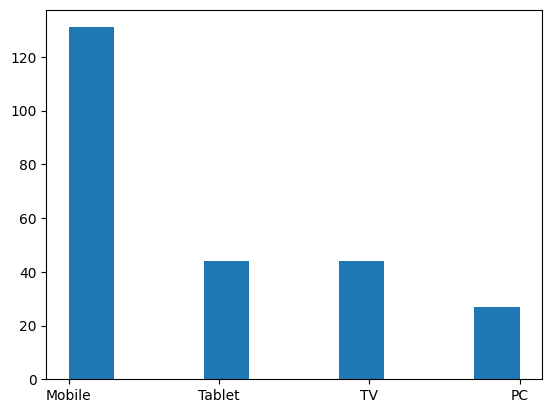

In [35]:
#devices analysis 
plt.hist(Churned_data['Devices_Used'])

(array([30., 27., 18., 23., 22., 23., 23., 24., 24., 32.]),
 array([1000. , 1009.9, 1019.8, 1029.7, 1039.6, 1049.5, 1059.4, 1069.3,
        1079.2, 1089.1, 1099. ]),
 <BarContainer object of 10 artists>)

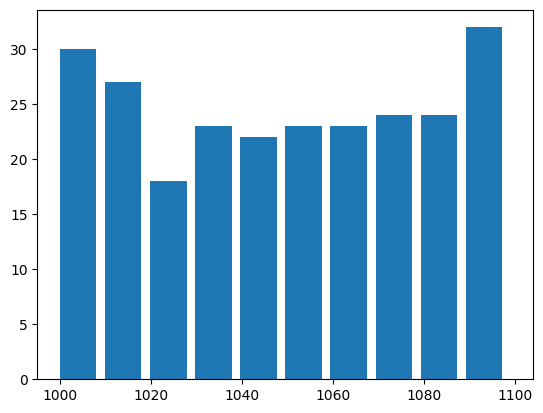

In [78]:
#Content_ID	
plt.hist(Churned_data['Content_ID'],width=8)

<Axes: ylabel='Monthly_Hours_Watched'>

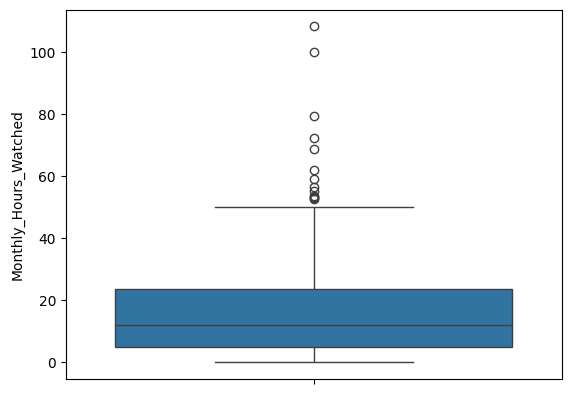

In [50]:
sns.boxplot(Churned_data['Monthly_Hours_Watched'])



<Axes: ylabel='Rating_Given'>

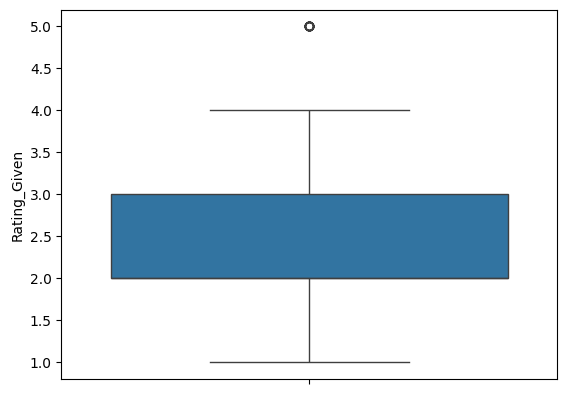

In [89]:
#Rating_Given
sns.boxplot(Churned_data['Rating_Given'])

In [52]:
Unchurned_data=df[df['Churned']==0]

In [38]:

reason_for_churn = Churned_data['Reason_for_Churn']

print(reason_for_churn.describe())

reason_counts = reason_for_churn.value_counts()
print(reason_counts)




count                246
unique                 4
top       Price increase
freq                  68
Name: Reason_for_Churn, dtype: object
Reason_for_Churn
Price increase               68
Found better service         64
Personal reasons             62
Dissatisfied with content    52
Name: count, dtype: int64


In [39]:
Churned_data

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
12,13,41,Other,North,2021-04-22 01:53:37.657108,Standard,14.99,Direct Debit,14.011035,Sci-Fi,Mobile,0.152133,1059,5,1,2021-06-13 01:53:37.657108,Found better service
13,14,70,Other,South,2020-10-29 01:53:37.657119,Standard,14.99,Direct Debit,35.339461,Sci-Fi,Mobile,3.346005,1011,2,1,2021-03-11 01:53:37.657119,Found better service
14,15,53,Other,East,2023-10-06 01:53:37.657130,Standard,14.99,Credit Card,14.191293,Documentary,Mobile,2.791956,1020,1,1,2024-07-02 01:53:37.657130,Price increase
16,17,41,Other,South,2019-07-27 01:53:37.657151,Premium,19.99,Credit Card,12.991876,Drama,Mobile,2.519855,1043,1,1,2020-03-16 01:53:37.657151,Found better service
29,30,39,Male,North,2019-11-05 01:53:37.657296,Standard,14.99,Credit Card,22.258651,Comedy,Mobile,0.838116,1034,2,1,2020-08-13 01:53:37.657296,Price increase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,26,Male,Central,2021-10-06 01:53:37.667748,Basic,9.99,Direct Debit,5.586560,Sci-Fi,PC,3.773253,1025,5,1,2022-05-30 01:53:37.667748,Found better service
991,992,34,Female,Central,2019-10-04 01:53:37.667839,Standard,14.99,PayPal,13.864300,Drama,PC,0.500756,1003,3,1,2019-11-09 01:53:37.667839,Personal reasons
992,993,43,Female,East,2021-01-26 01:53:37.667850,Premium,19.99,Credit Card,2.735002,Action,Mobile,0.070838,1099,1,1,2021-10-24 01:53:37.667850,Personal reasons
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service


In [40]:
Churned_data.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0
mean,505.361789,43.174797,14.502195,17.039672,1.920114,1050.443089,2.593496,1.0
std,284.676765,15.507139,3.494289,17.236483,1.841691,30.536877,1.273513,0.0
min,13.000000,18.000000,9.990000,0.041574,0.000821,1000.000000,1.000000,1.0
25%,273.250000,30.000000,9.990000,5.105890,0.641881,1022.250000,2.000000,1.0
50%,501.500000,41.000000,14.990000,11.948593,1.277379,1050.000000,2.000000,1.0
75%,752.250000,56.000000,14.990000,23.618435,2.704228,1077.750000,3.000000,1.0
max,999.000000,70.000000,19.990000,108.122364,11.417557,1099.000000,5.000000,1.0


In [41]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: Index(['Gender', 'Location', 'Subscription_Start_Date', 'Subscription_Type',
       'Payment_Method', 'Favorite_Genre', 'Devices_Used', 'Date_of_Churn',
       'Reason_for_Churn'],
      dtype='object')


In [42]:
selected_columns = ['Age', 'Monthly_Payment', 'Monthly_Hours_Watched','Average_Session_Length','Rating_Given' ]


In [43]:
df_selected = df[selected_columns]
print(df_selected)


     Age  Monthly_Payment  Monthly_Hours_Watched  Average_Session_Length  \
0     56            19.99              31.513153                1.195762   
1     69            14.99               4.982277                0.809002   
2     46            14.99               4.114953                1.153570   
3     32            14.99              60.244820                0.609503   
4     60            14.99               4.711855                0.359971   
..   ...              ...                    ...                     ...   
995   25             9.99               0.700179                3.310731   
996   66            14.99              20.153308                3.222521   
997   52            14.99              39.170314                1.221380   
998   69            14.99               8.455372                1.865411   
999   32             9.99               9.895619                1.853993   

     Rating_Given  
0               5  
1               1  
2               2  
3      

<Axes: >

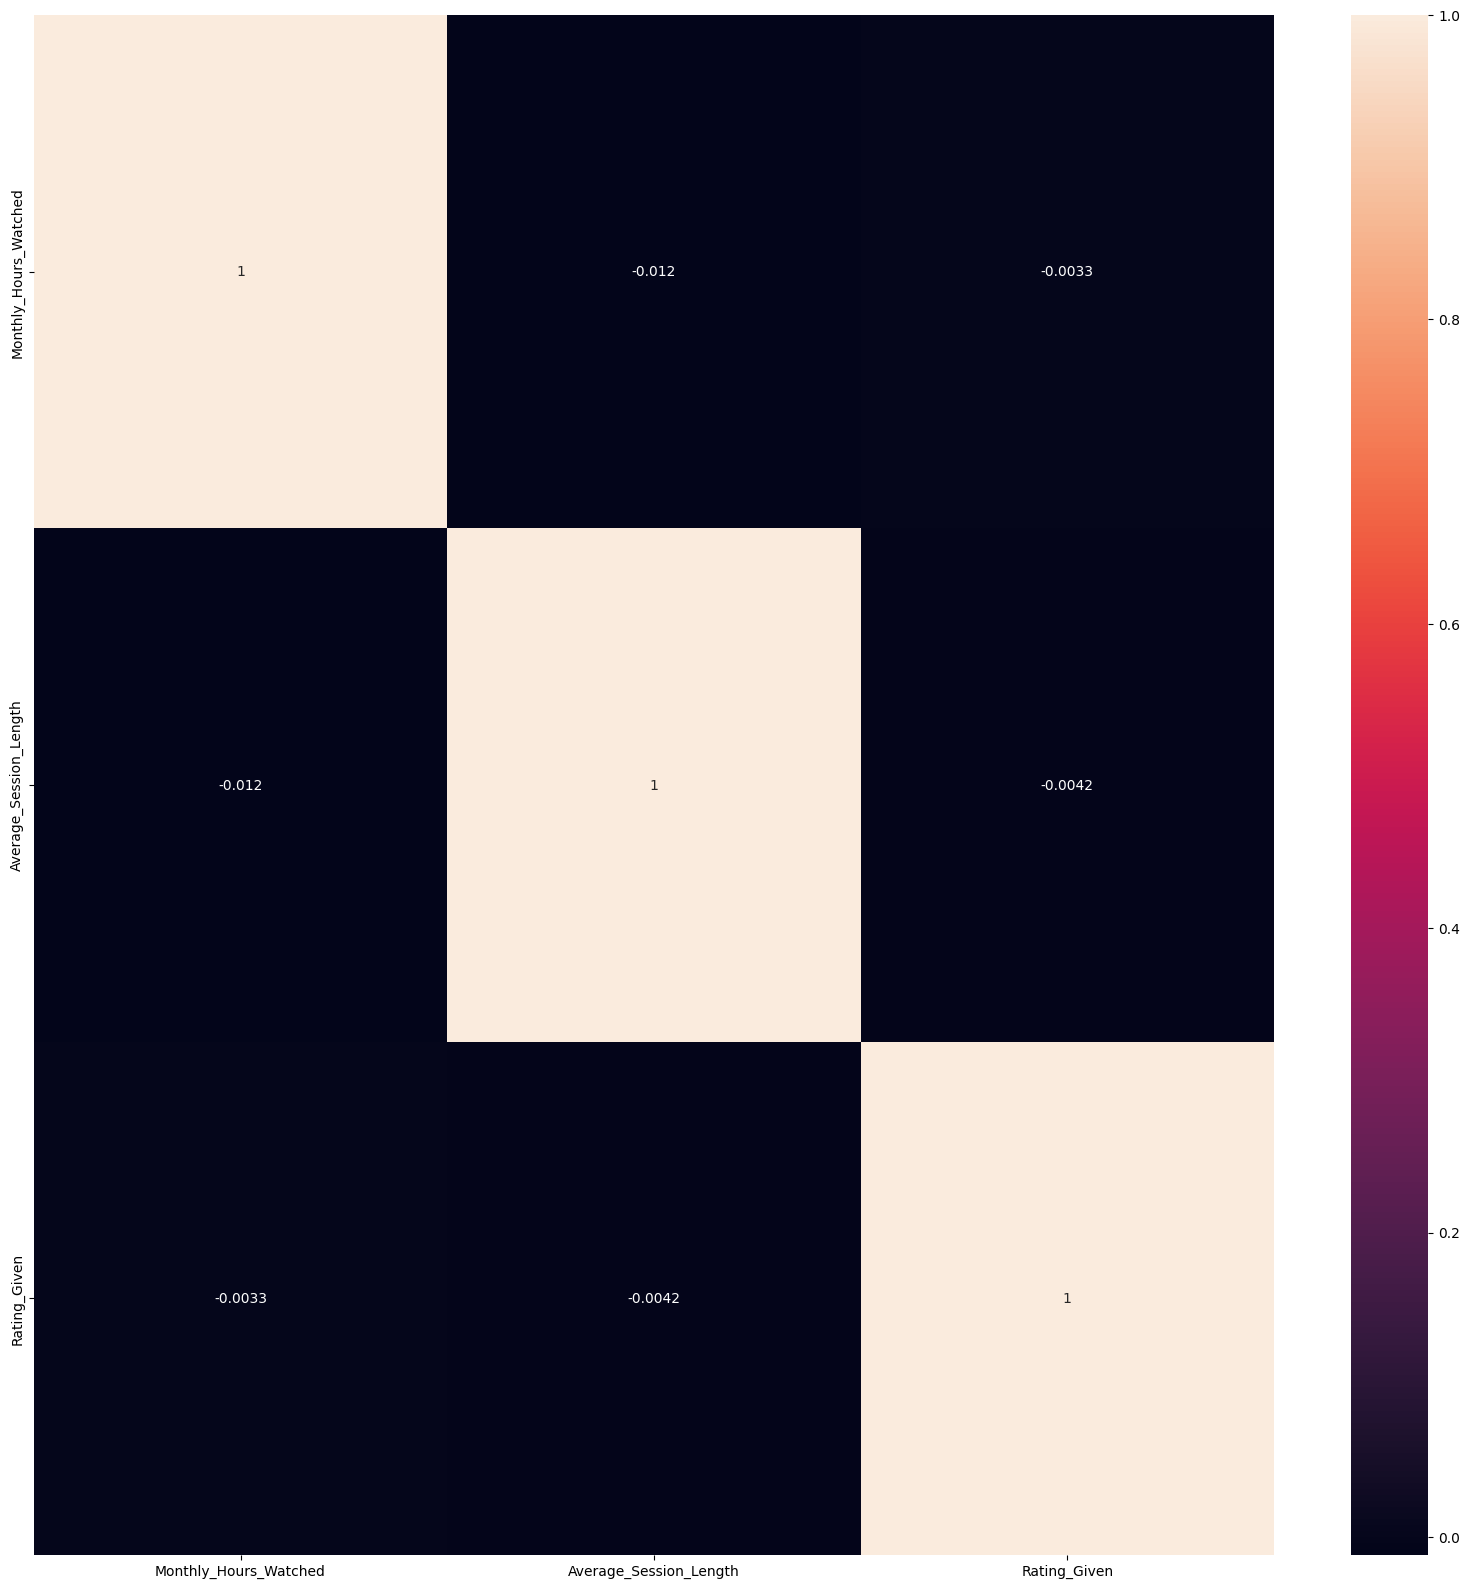

In [44]:
plt.figure(figsize = (20,20))
sns.heatmap(df_selected.iloc[:,2:].corr(), annot=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [46]:
df.dtypes

User_ID                      int64
Age                          int64
Gender                       int64
Location                     int64
Subscription_Start_Date      int64
Subscription_Type            int64
Monthly_Payment            float64
Payment_Method               int64
Monthly_Hours_Watched      float64
Favorite_Genre               int64
Devices_Used                 int64
Average_Session_Length     float64
Content_ID                   int64
Rating_Given                 int64
Churned                      int64
Date_of_Churn                int64
Reason_for_Churn             int64
dtype: object

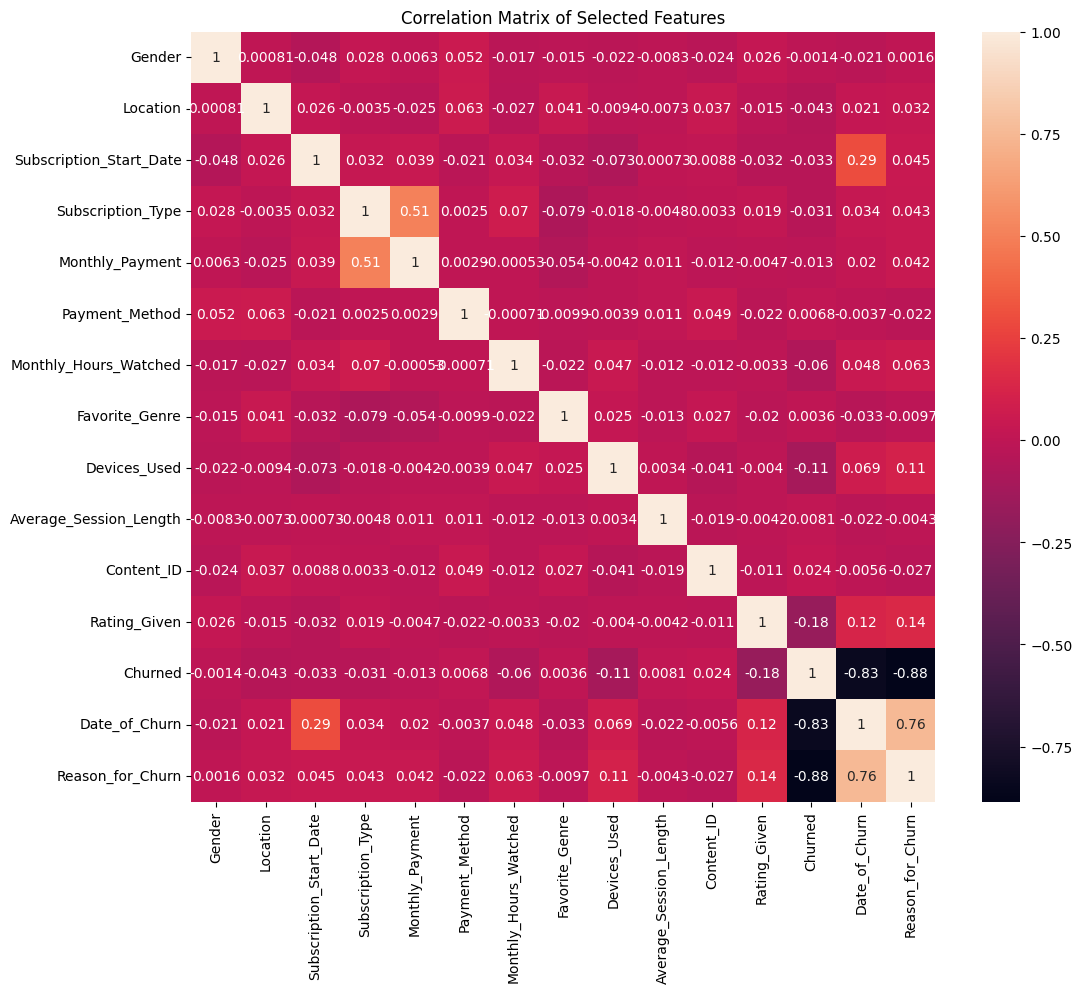

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True)
plt.title('Correlation Matrix of Selected Features')
plt.show()
